In [8]:
from sentence_transformers import SentenceTransformer
import glob
from PIL import Image
from annoy import AnnoyIndex

In [4]:
files = glob.glob("images/*/*.jpg")
len(files)

629

In [5]:
img_list = [Image.open(filepath).convert('RGB') for filepath in files]
len(img_list)

629

In [6]:
model = SentenceTransformer('clip-ViT-B-32')

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [7]:
embeddings = model.encode(img_list, 
                              batch_size=32,
                              # device=args.device,
                              show_progress_bar=False)

In [9]:
bhl_index = AnnoyIndex(512, metric='angular')

In [10]:
for idx, emb in enumerate(embeddings):
    bhl_index.add_item(idx, emb)
bhl_index.build(10)

True

In [11]:
query_emb = model.encode(["medieval drawing of a plant"], show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

36


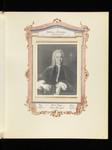

6


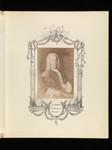

609


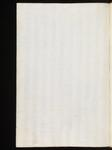

22


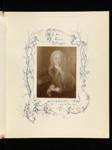

529


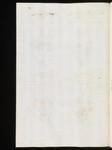

In [18]:
query_emb = model.encode(["portrait"], show_progress_bar=True)
closest_5_idx, closest_5_dist = bhl_index.get_nns_by_vector(query_emb[0], 5,
                                        include_distances=True)
for idx in closest_5_idx:
    print(idx)
    display(img_list[idx])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

137


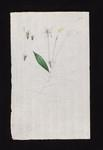

100


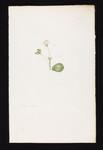

186


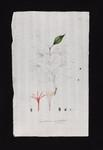

287


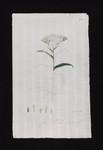

449


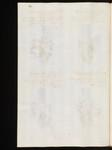

In [20]:
query_emb = model.encode(["medieval drawing of a leaf"], show_progress_bar=True)
closest_5_idx, closest_5_dist = bhl_index.get_nns_by_vector(query_emb[0], 5,
                                        include_distances=True)
for idx in closest_5_idx:
    print(idx)
    display(img_list[idx])